# Introduction


**Project Overview**
This project analyzes ad impression data from a digital advertising platform, examining 12,000 impressions served across 2024. We adopt the perspective of independent ad analytics consultants—advising the platform on revenue optimization and inventory strategy using a data-driven approach.

**Dataset Structure:**

12 months of 2024 activity with three ad formats: InApp (Native), Banner, and Interstitial (Non-Native)

**Key fields:** Cost (platform revenue per impression), predicted click-through rate (CTR), content rating, category, and campaign metadata

**Data quality:** ~8% missing cost and CTR values; ~4% missing dates

**Analysis Approach:**
We use exploratory visualization (bar charts, boxplots, scatter plots, heatmaps) to identify cost drivers, spending patterns, and strategic opportunities across ad dimensions while maintaining awareness of data quality constraints.

# **Class Defintion and Structure**

**AdAnalytic (Parent class)**

In [ ]:
class AdAnalytic:
    def __init__(self, date, tag, sub_type, type, rating, cost, predicted_ctr):
        self.date = date
        self.tag = tag
        self.sub_type = sub_type
        self.type = type
        self.rating = rating
        self.cost = cost
        self.predicted_ctr = predicted_ctr
        self.unique_id = id(self) #memory id of the instance of the class


    def __str__(self):
        return f"{self.unique_id},{self.date},{self.tag},{self.sub_type},{self.type},{self.rating},{self.cost},{self.predicted_ctr}"


**NativeAdAnalytic and NonNativeAdAnalytic (sub classes)**

Create two classes NativeAdAnalytic and NonNativeAdAnalytic both inherit from AdAnalytic

In [ ]:
class NativeAdAnalytic(AdAnalytic):
    def __init__(self, date, tag, sub_type, rating, cost, predicted_ctr):
        #Use super() to call the constructor of parent class with parameters
        super().__init__(date, tag, sub_type, "Native", rating, cost, predicted_ctr)


class NonNativeAdAnalytic(AdAnalytic):
    def __init__(self, date, tag, sub_type, rating, cost, predicted_ctr):
        super().__init__(date, tag, sub_type, "non-Native", rating, cost, predicted_ctr)


**InApp, Banner, and Interstitial (child classes)**

Create three additional subclasses:
* InApp inherits from parent class NativeAdAnalytic.
* Banner and Interstitial inherit from parent class NonNativeAdAnalytic

In [ ]:
class InApp(NativeAdAnalytic):
    def __init__(self, date, tag, rating, cost, predicted_ctr):
        super().__init__(date, tag, "InApp", rating, cost, predicted_ctr)

class Banner(NonNativeAdAnalytic):
    def __init__(self, date, tag, rating, cost, predicted_ctr):
        super().__init__(date, tag, "Banner", rating, cost, predicted_ctr)

class Interstitial(NonNativeAdAnalytic):
    def __init__(self, date, tag, rating, cost, predicted_ctr):
        super().__init__(date, tag, "Interstitial", rating, cost, predicted_ctr)


**Test above code**

In [ ]:
BannerAdAnalytic = Banner("2024-11-15","tagA",2,641,86.06)
print(str(BannerAdAnalytic))

140122207824992,2024-11-15,tagA,Banner,non-Native,2,641,86.06


**Load the pickle data**

In [ ]:
import pickle
data = None
with open('AdAnalyticpkl638200305.dat', 'rb') as fb:
    try:
        while (True):
            data = pickle.load(fb)
            print(len(data))
    except EOFError:
        pass

12000


**Save to CSV**

In [ ]:
with open('data.csv', 'w') as f:
    f.write("unique_id,date,tag,sub_type,type,rating,cost,predicted_ctr\n")
    for obj in data:
        f.write(str(obj) + '\n')

# Exploratory Data Analysis

**Goal** - Build a comprehensive understanding of ad pricing drivers to inform budget allocation, format selection, and cost optimization strategy.

**Load data using Pandas**

**Step 1: Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

In [ ]:
df.head(3)

,unique_id,date,tag,sub_type,type,rating,cost,predicted_ctr
0,137576507102928,2024-07-09,InApp,Finance,Native,NaN,7.0,19.68
1,137576507102304,2024-08-12,InApp,E-commerce,Native,PG-17,13.0,20.50
2,137576507102832,2024-04-30,InApp,Finance,Native,PG-17,7.0,23.92


**Step 2: Explore data fields**

Get rows and columns in dataframe

In [ ]:
df.shape

(12000, 8)

Get type of each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unique_id      12000 non-null  int64  
 1   date           11512 non-null  object 
 2   tag            12000 non-null  object 
 3   sub_type       12000 non-null  object 
 4   type           12000 non-null  object 
 5   rating         11514 non-null  object 
 6   cost           11037 non-null  float64
 7   predicted_ctr  11037 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 750.1+ KB


Find missing values in columns

In [ ]:
df.isna().sum()

,0
unique_id,0
date,488
tag,0
sub_type,0
type,0
rating,486
cost,963
predicted_ctr,963


**Step 3: Impute missing values**

In [ ]:
# Determine column to group by for impute
print("Tags",end=":")
print(df['tag'].unique())
print("Type",end=":")
print(df['type'].unique())
print("Sub-type",end=":")
print(df['sub_type'].unique())

Tags:['InApp' 'Banner' 'Interstitial']
Type:['Native' 'non-Native']
Sub-type:['Finance' 'E-commerce' 'Games' 'Entertainment' 'Shopping' 'Travel'
 'Social Media']


Decision - We will use sub-type to group values for impute

a. Numerical column with missing values - Cost

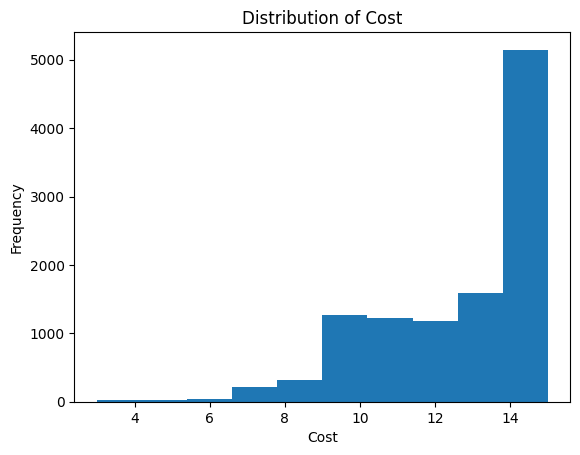

In [ ]:
#Histogram for Cost - Shows Skew

plt.hist(df['cost'])

# Add labels and a title
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Cost')

# Display the plot
plt.show()

Decision - As Cost data is skewed impute using Median

In [ ]:
# # Find MEDIAN for Cost column
cost_median = df['cost'].median()
print("Median Cost", cost_median)

Median Cost 13.0


In [ ]:
#Fill with Median grouped by Sub-type
df['cost'] = df.groupby('sub_type')['cost'].transform(lambda x:x.fillna(x.median()))

b. Numerical column with missing values - Predicted CTR

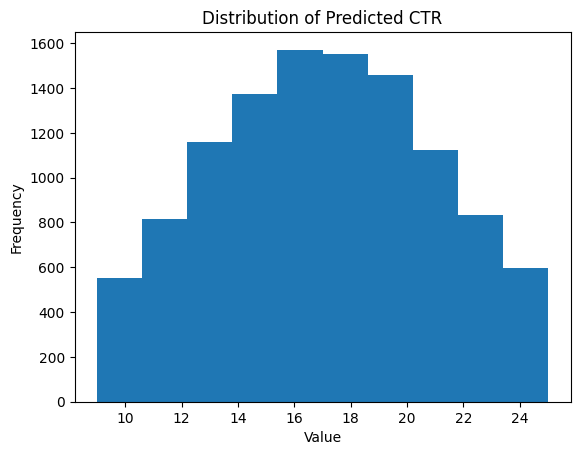

In [ ]:
#Histogram for Predict_CTR - Normally distributed

plt.hist(df['predicted_ctr'])

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted CTR')

# Display the plot
plt.show()

In [ ]:
# # Find MEAN for Predicted CTR column
ctr_mean = df['predicted_ctr'].mean().round(2)

print("Mean Predicted_CTR",ctr_mean)

Mean Predicted_CTR 17.04


In [ ]:
# Test MEAN for Predicted CTR by Sub-type
ctr_mean_grp = df.groupby('sub_type')['predicted_ctr'].mean()["Finance"] #Check for 'Finance' 'E-commerce' 'Games'

print("Mean Predicted_CTR", ctr_mean_grp)

Mean Predicted_CTR 20.97625


Decision - As Predicted_CTR data is normally distributed impute using Mean

In [ ]:
#Fill with Mean grouped by Sub-type
df['predicted_ctr'] = df.groupby('sub_type')['predicted_ctr'].transform(lambda x:x.fillna(x.mean()))

c. Catagorical column with missing values - Rating

In [ ]:
# Find and store MODE values
rating_mode = df['rating'].mode()[0]

print("Mode Rating",rating_mode)

Mode Rating R


Decision - As Rating data is catagorical impute using Mode

In [ ]:
# 'rating' with the Mode
if df['rating'].isnull().any():
    df['rating'].fillna(rating_mode, inplace=True)

/tmp/ipython-input-2599683092.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(rating_mode, inplace=True)


In [ ]:
#Check null values
df.isna().sum()

,0
unique_id,0
date,488
tag,0
sub_type,0
type,0
rating,0
cost,0
predicted_ctr,0


d. Impute date field

In [ ]:
df['date'] = pd.to_datetime(df['date'])

full_date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
df_dates_complete = pd.DataFrame(full_date_range, columns=['date'])

df_merged = pd.merge(df_dates_complete, df, on='date', how='left')

df = df_merged


In [ ]:
#Check null values
df.isna().sum()

,0
date,0
unique_id,0
tag,0
sub_type,0
type,0
rating,0
cost,0
predicted_ctr,0


**Step 4 - Data Transformation - Add a column for ROI measure**

In [ ]:
# Logic: CTR per $1 spent
df['roi'] = df['predicted_ctr'] / df['cost']

In [ ]:
# Confirm new column in df
print(df[['sub_type', 'cost', 'predicted_ctr', 'roi']].head())

     sub_type  cost  predicted_ctr       roi
0     Finance   7.0      17.970000  2.567143
1    Shopping  11.0      17.820000  1.620000
2  E-commerce  14.0      11.730000  0.837857
3  E-commerce  14.0      15.440000  1.102857
4  E-commerce  14.0      17.045003  1.217500


# Data Visualization

# Bar Plot

Goal - Diagnose platform inventory performance to identify under-monetized assets, optimize supply allocation, and restructure pricing tiers for revenue maximization

### Type vs. Tag

In [ ]:
# Group by type and tag, sum cost
type_tag_spend = df.groupby(['type', 'tag'])['cost'].sum().reset_index()

# Pivot table
pivot_table = type_tag_spend.pivot(index='tag', columns='type', values='cost').fillna(0)

# Convert all values to integer
pivot_table = pivot_table.astype(int)

# Display
print(pivot_table)

type          Native  non-Native
tag                             
Banner             0       27008
InApp           1283           0
Interstitial       0      117093


**Insight**

InApp is exclusively Native format, while Banner and Interstitial are Non-Native.

### Ad Spend by Tag

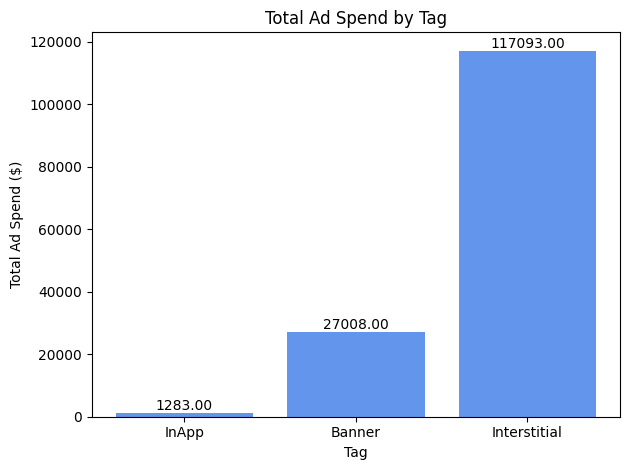

In [ ]:
# Group data by tag and sum the ad spend
cost_by_tag = df.groupby('tag')['cost'].sum().reset_index()

# Sort by cost in ascending order (lowest to highest)
cost_by_tag = cost_by_tag.sort_values('cost', ascending=True)

# x-coordinates (categorical values)
x_values = cost_by_tag['tag']

# heights of bars
heights = cost_by_tag['cost']

# plotting a bar chart
bars = plt.bar(x_values, heights, width=0.8, color='cornflowerblue')

# add value labels on top of bars
plt.bar_label(bars, fmt='%.2f')

# naming the x-axis
plt.xlabel('Tag')

# naming the y-axis
plt.ylabel('Total Ad Spend ($)')

# plot title
plt.title('Total Ad Spend by Tag')

plt.tight_layout()

# function to show the plot
plt.show()


**Insights**
1. Ad spend is heavily concentrated in Non-Native formats.

2. Native ads are gaining market share due to their seamless integration with app content, while the platform still relies on legacy display-ad thinking. .[Source: https://www.snsinsider.com/reports/in-app-advertising-market-5748]

Opportunity: Diversify revenue by increasing Native InApp inventory and promoting it to advertisers, potentially increasing revenue as demand for premium native placements grows.



### Average Ad Spend by Rating

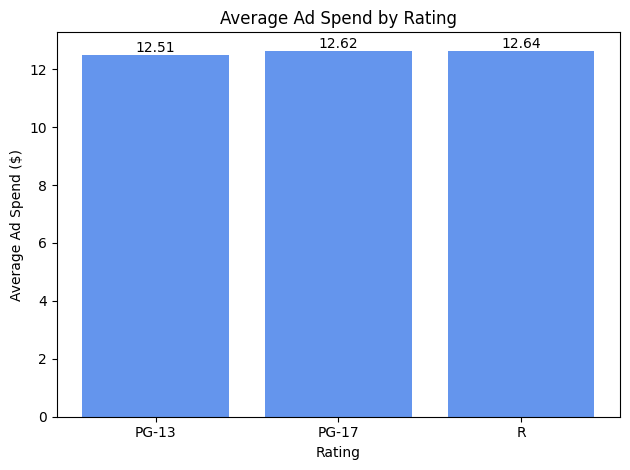

In [ ]:
# Group data by rating and calculate the average ad spend
cost_by_rating = df.groupby('rating')['cost'].mean().reset_index()

# x-coordinates (categorical values)
x_values = cost_by_rating['rating']

# heights of bars
heights = cost_by_rating['cost']

# plotting a bar chart
bars = plt.bar(x_values, heights, width=0.8, color='cornflowerblue')

# Add value labels on top of bars
plt.bar_label(bars, fmt='%.2f')

# Naming the x-axis
plt.xlabel('Rating')

# Naming the y-axis
plt.ylabel('Average Ad Spend ($)')

# plot title
plt.title('Average Ad Spend by Rating')

# adjust layout to prevent label cutoff
plt.tight_layout()

# function to show the plot
plt.show()

**Insights**
1. Average ad cost is almost the  same for every rating — no price differentiation.

2. In digital advertising markets, restricted categories (gambling, alcohol) pay premium rates to access limited inventory

**Opportunity**: Implement tiered pricing based on content rating to capture untapped revenue



#Pie chart

### Impression of Ad by Category

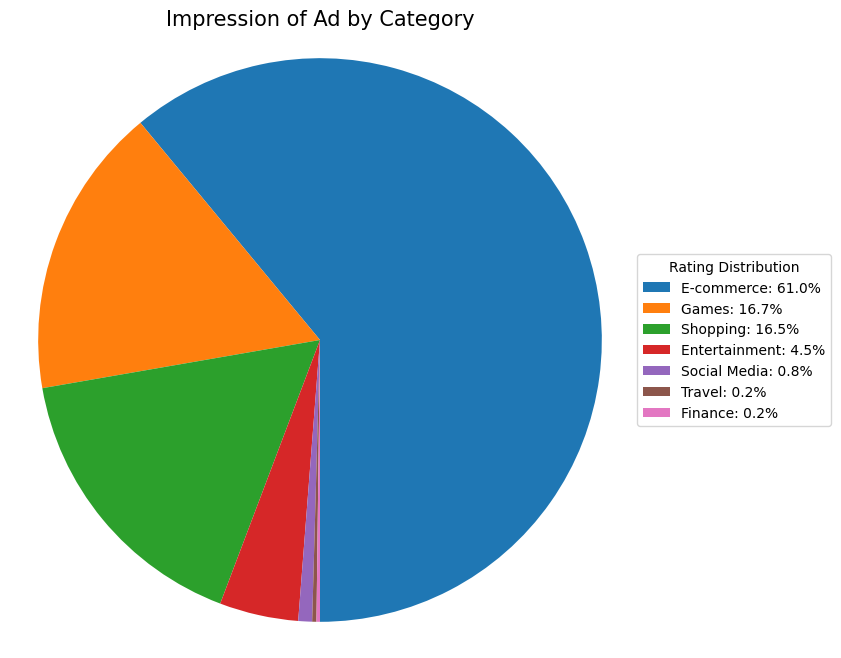

In [ ]:
# Count frequency of each Sub-type
rating_counts = df['sub_type'].value_counts()

# Calculate percentages
percentages = 100 * rating_counts / rating_counts.sum()
legend_labels = [f"{cat}: {pct:.1f}%" for cat, pct in zip(rating_counts.index, percentages)]

# Plot pie chart without autopct
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(
    rating_counts,
    startangle=270
)

# Add legend with percentage labels
plt.legend(
    wedges,
    legend_labels,
    title="Rating Distribution",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Equal aspect ratio ensures the pie chart is circular
plt.title("Impression of Ad by Category", fontsize=15, pad=5)
plt.axis('equal')

# Show plot
plt.show()


**Key Insights:**


*   E-commerce dominates the categoty with 61%
*   Games and Shopping has equal share of around 17%
*   Social media, Travel and Finance are extremely limited and under represented with less than 1%.
*   Category distribution is highly imbalanced.









### Impression of Ad by Type

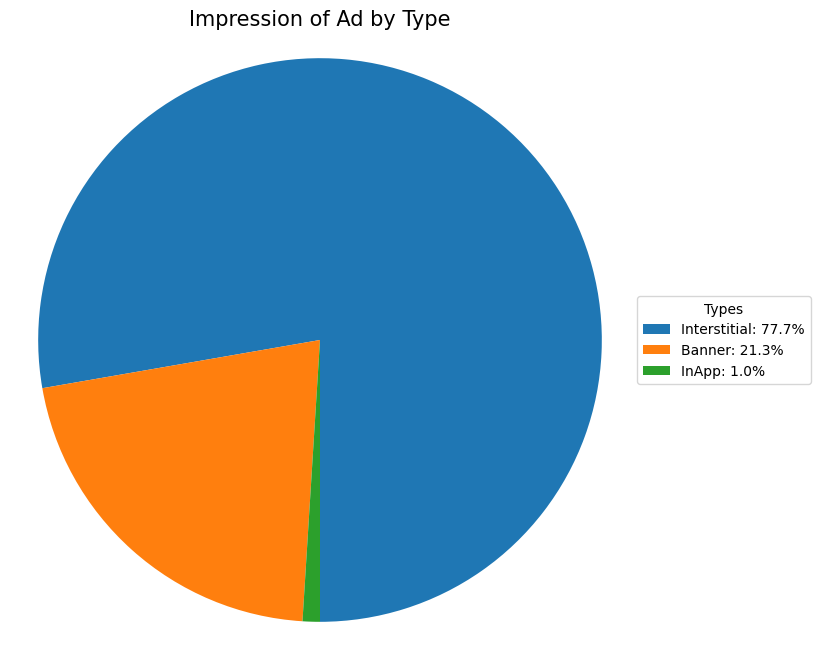

In [ ]:
# Count frequency of each type
rating_counts = df['tag'].value_counts()

# Calculate percentages
percentages = 100 * rating_counts / rating_counts.sum()
legend_labels = [f"{cat}: {pct:.1f}%" for cat, pct in zip(rating_counts.index, percentages)]

# Plot pie chart without autopct
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(
    rating_counts,
    startangle=270
)

# Add legend with percentage labels
plt.legend(
    wedges,
    legend_labels,
    title="Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Equal aspect ratio ensures the pie chart is circular
plt.title("Impression of Ad by Type", fontsize=15, pad=5)
plt.axis('equal')

# Show plot
plt.show()

**Key Insights:**


*   Interstial dominates our inventory
*   Banner usgae is Moderate
*   In-App ad placements are extremely limited. Highest CTR format, but very limited in our Ad inventory.

# **Box Plots**

In [ ]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month if needed
df['month'] = df['date'].dt.strftime("%b")

### Cost Distribution Across Native vs Non-Native ads

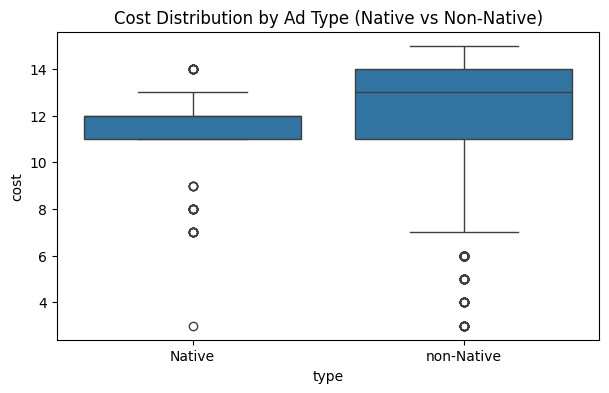

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x="type", y="cost", data=df)
plt.title("Cost Distribution by Ad Type (Native vs Non-Native)")
plt.show()

**Key Insights:**


1.   Native Ads Show Lower Median Cost.
2.   Non-Native Ads Have Wider Cost Variability.



### Predicted CTR Across Native vs Non-Native Ads

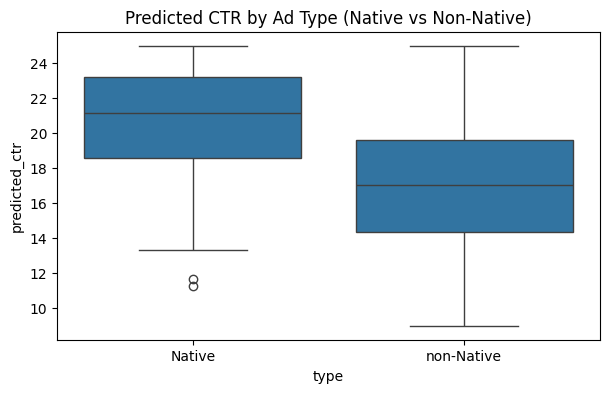

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x="type", y="predicted_ctr", data=df)
plt.title("Predicted CTR by Ad Type (Native vs Non-Native)")
plt.show()

**Key Insights:**


1.   Native Ads Drive Higher Engagement.
2.   Native Ads Offer More Consistent Performance.



### Cost Distribution Across Ad Formats

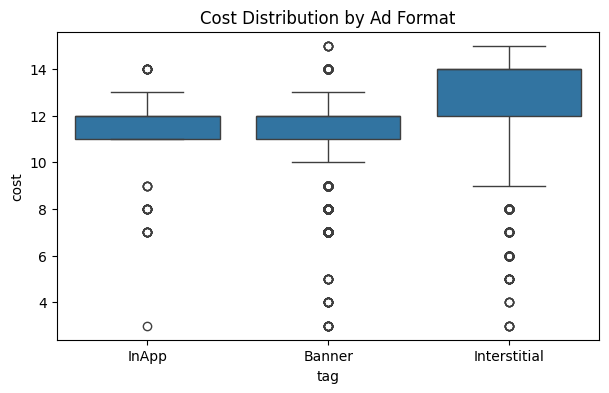

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x="tag", y="cost", data=df)
plt.title("Cost Distribution by Ad Format")
plt.show()

**Key Insights:**


1.   Interstitial Ads Are the Most Expensive.
2.   InApp and Banner Ads Show Similar Cost Profiles.


### Cost Variability by Content Rating

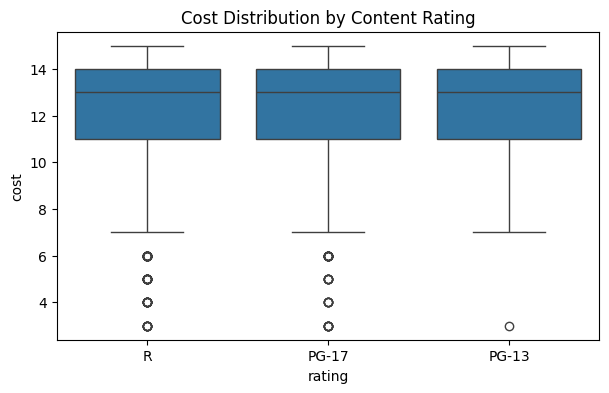

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x="rating", y="cost", data=df)
plt.title("Cost Distribution by Content Rating")
plt.show()

**Key Insights:**


1.   Cost Is Consistent Across Ratings.
2.   PG-17 and R Ratings Show More Cost Outliers.



### Cost Distribution Across Sub Types

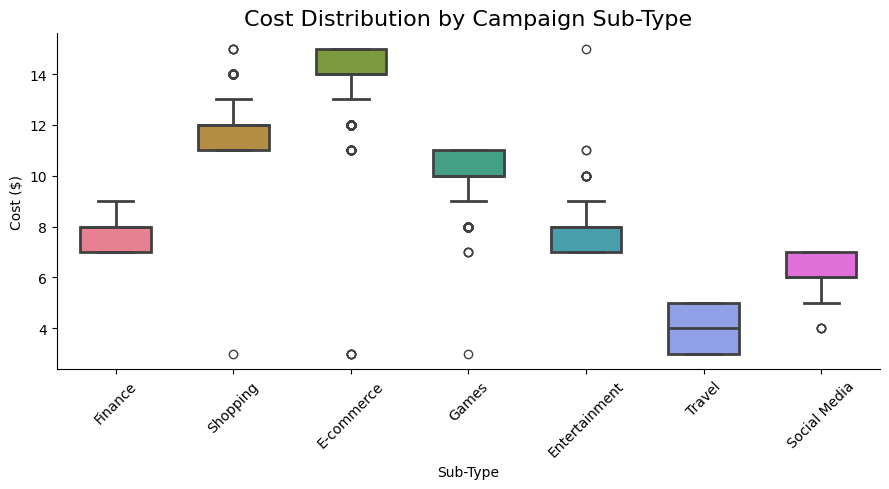

In [ ]:
plt.figure(figsize=(9, 5))

palette = sns.color_palette("husl", df["sub_type"].nunique())

sns.boxplot(
    x="sub_type",
    y="cost",
    data=df,
    hue="sub_type",        # required when using palette
    palette=palette,
    linewidth=2,
    width=0.6,
    dodge=False            # keeps single box per category
)

# Remove legend added by hue
plt.legend([], [], frameon=False)

plt.xticks(rotation=45)
plt.title("Cost Distribution by Campaign Sub-Type", fontsize=16)
plt.xlabel("Sub-Type")
plt.ylabel("Cost ($)")
sns.despine()
plt.tight_layout()
plt.show()





### Predicted CTR Across Sub Types

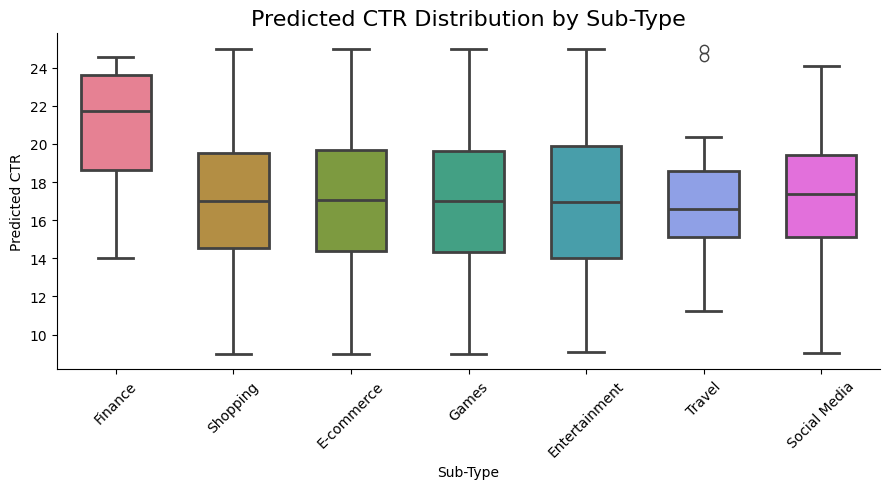

In [ ]:
plt.figure(figsize=(9, 5))

palette = sns.color_palette("husl", df["sub_type"].nunique())

sns.boxplot(
    x="sub_type",
    y="predicted_ctr",
    data=df,
    hue="sub_type",        # required when using palette
    palette=palette,
    linewidth=2,
    width=0.6,
    dodge=False            # keeps single box per category
)

# Remove legend added by hue
plt.legend([], [], frameon=False)

plt.xticks(rotation=45)
plt.title("Predicted CTR Distribution by Sub-Type", fontsize=16)
plt.xlabel("Sub-Type")
plt.ylabel("Predicted CTR")
sns.despine()
plt.tight_layout()
plt.show()


**Key Insights for above two boxplots:​**

1.   Finance Ads – High-Value, Low-Risk​


  *   Highest median predicted CTR among all categories.​
  *   Very tight cost range → minimal variability and predictable spend.​
  *   Ideal for advertisers seeking consistent, high-return campaigns.​

2.   Cost-Efficient Opportunity​
*   Comparable predicted CTR consistency to Shopping, E-commerce and Games (similar IQR).​
*   Operates at lower cost, achieving similar engagement for less spend.​
*   Opportunity to promote underutilized categories with better ROI.​


### Monthly Cost Variation

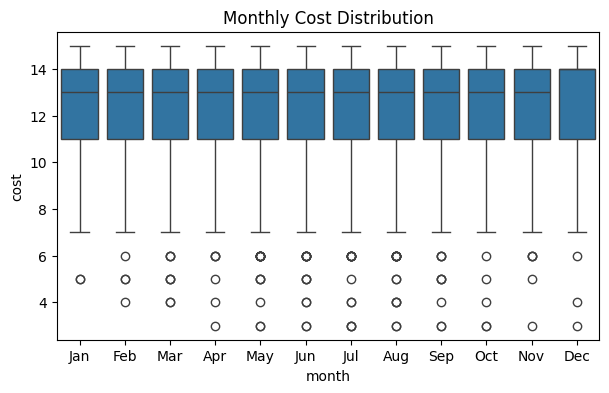

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x="month", y="cost", data=df, order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title("Monthly Cost Distribution")
plt.show()

**Key Insights:**


1.   Cost Stability Across Most Months.
2.   Presence of Low-Cost Outliers in Multiple Months.



# **Heat Maps**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure date column is parsed
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()

### Cost by Ad Format (Tag) vs Type

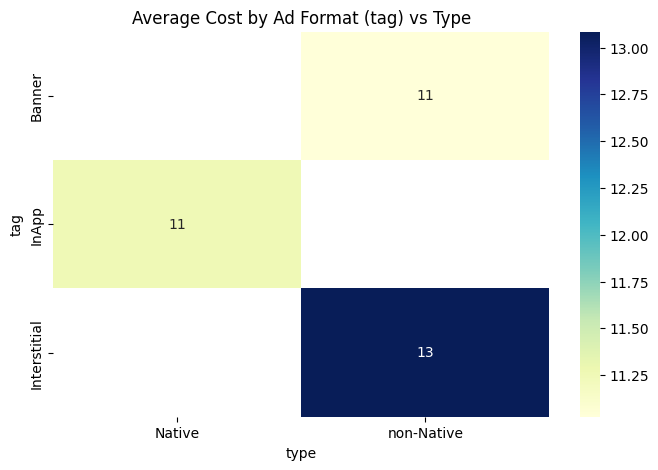

In [ ]:
pivot_cost = df.pivot_table(values='cost',
                            index='tag',
                            columns='type',
                            aggfunc='mean')

plt.figure(figsize=(8,5))
sns.heatmap(pivot_cost, annot=True, cmap="YlGnBu")
plt.title("Average Cost by Ad Format (tag) vs Type")
plt.show()

**Key Insights:**


1.   Interstitial Non-Native Ads Are the Most Expensive.
2.   Cost Uniformity Across Other Formats.



### Predicted CTR by Rating vs Sub-Type

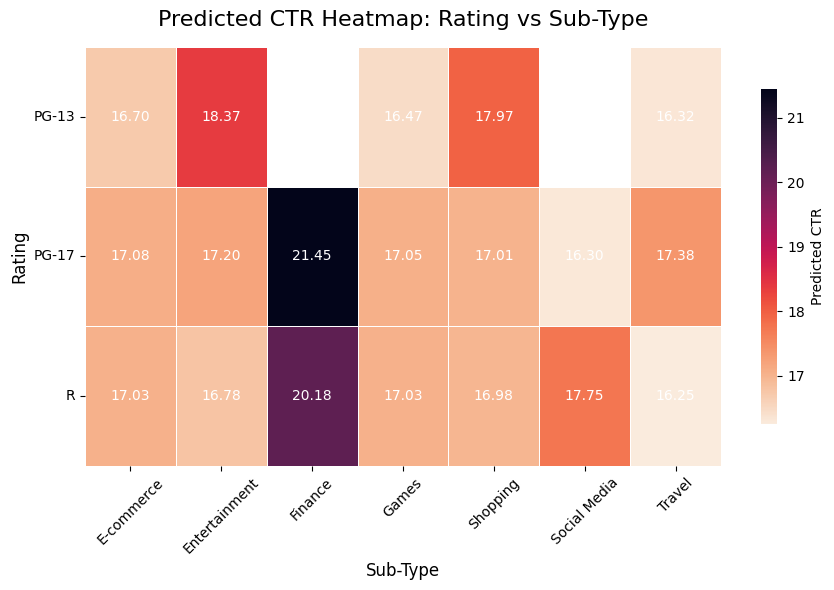

In [ ]:
# Pivot table
pivot_ctr = df.pivot_table(
    values='predicted_ctr',
    index='rating',
    columns='sub_type',
    aggfunc='mean'
)

# Plot
plt.figure(figsize=(9, 6))

sns.heatmap(
    pivot_ctr,
    annot=True,
    fmt=".2f",
    cmap="rocket_r",           # Attractive reversed palette
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8, 'label': 'Predicted CTR'},
    square=False,
    annot_kws={"size": 10, "color": "white"}
)

plt.title("Predicted CTR Heatmap: Rating vs Sub-Type", fontsize=16, pad=15)
plt.xlabel("Sub-Type", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.xticks(rotation=45)
plt.yticks(rotation=0)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


**Key Insights:​**
1.   Finance ads consistently generate the
highest CTR across all ratings.​
2.   Entertainment and Shopping perform well
only for PG-13 audiences.







### Monthly Predicted CTR Heatmap

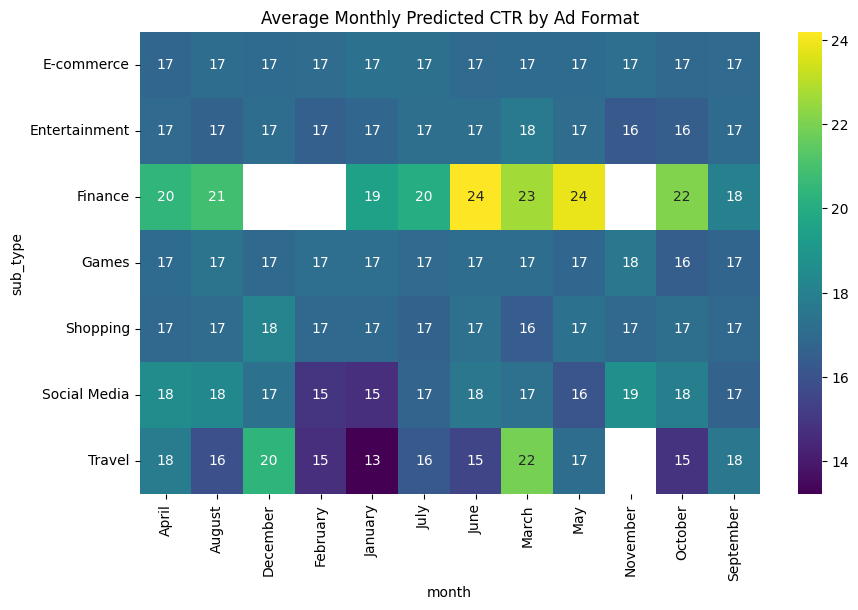

In [ ]:
pivot_month = df.pivot_table(values='predicted_ctr',
                             index='sub_type',
                             columns='month',
                             aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_month, annot=True, cmap="viridis")
plt.title("Average Monthly Predicted CTR by Ad Format")
plt.show()

**Key Insights:**


1.   Finance Campaigns Deliver Peak CTR in Late Q2.
2.   Social Media CTR Is Lowest in February.



#Histogram

### Predicted CTR Across All Impressions

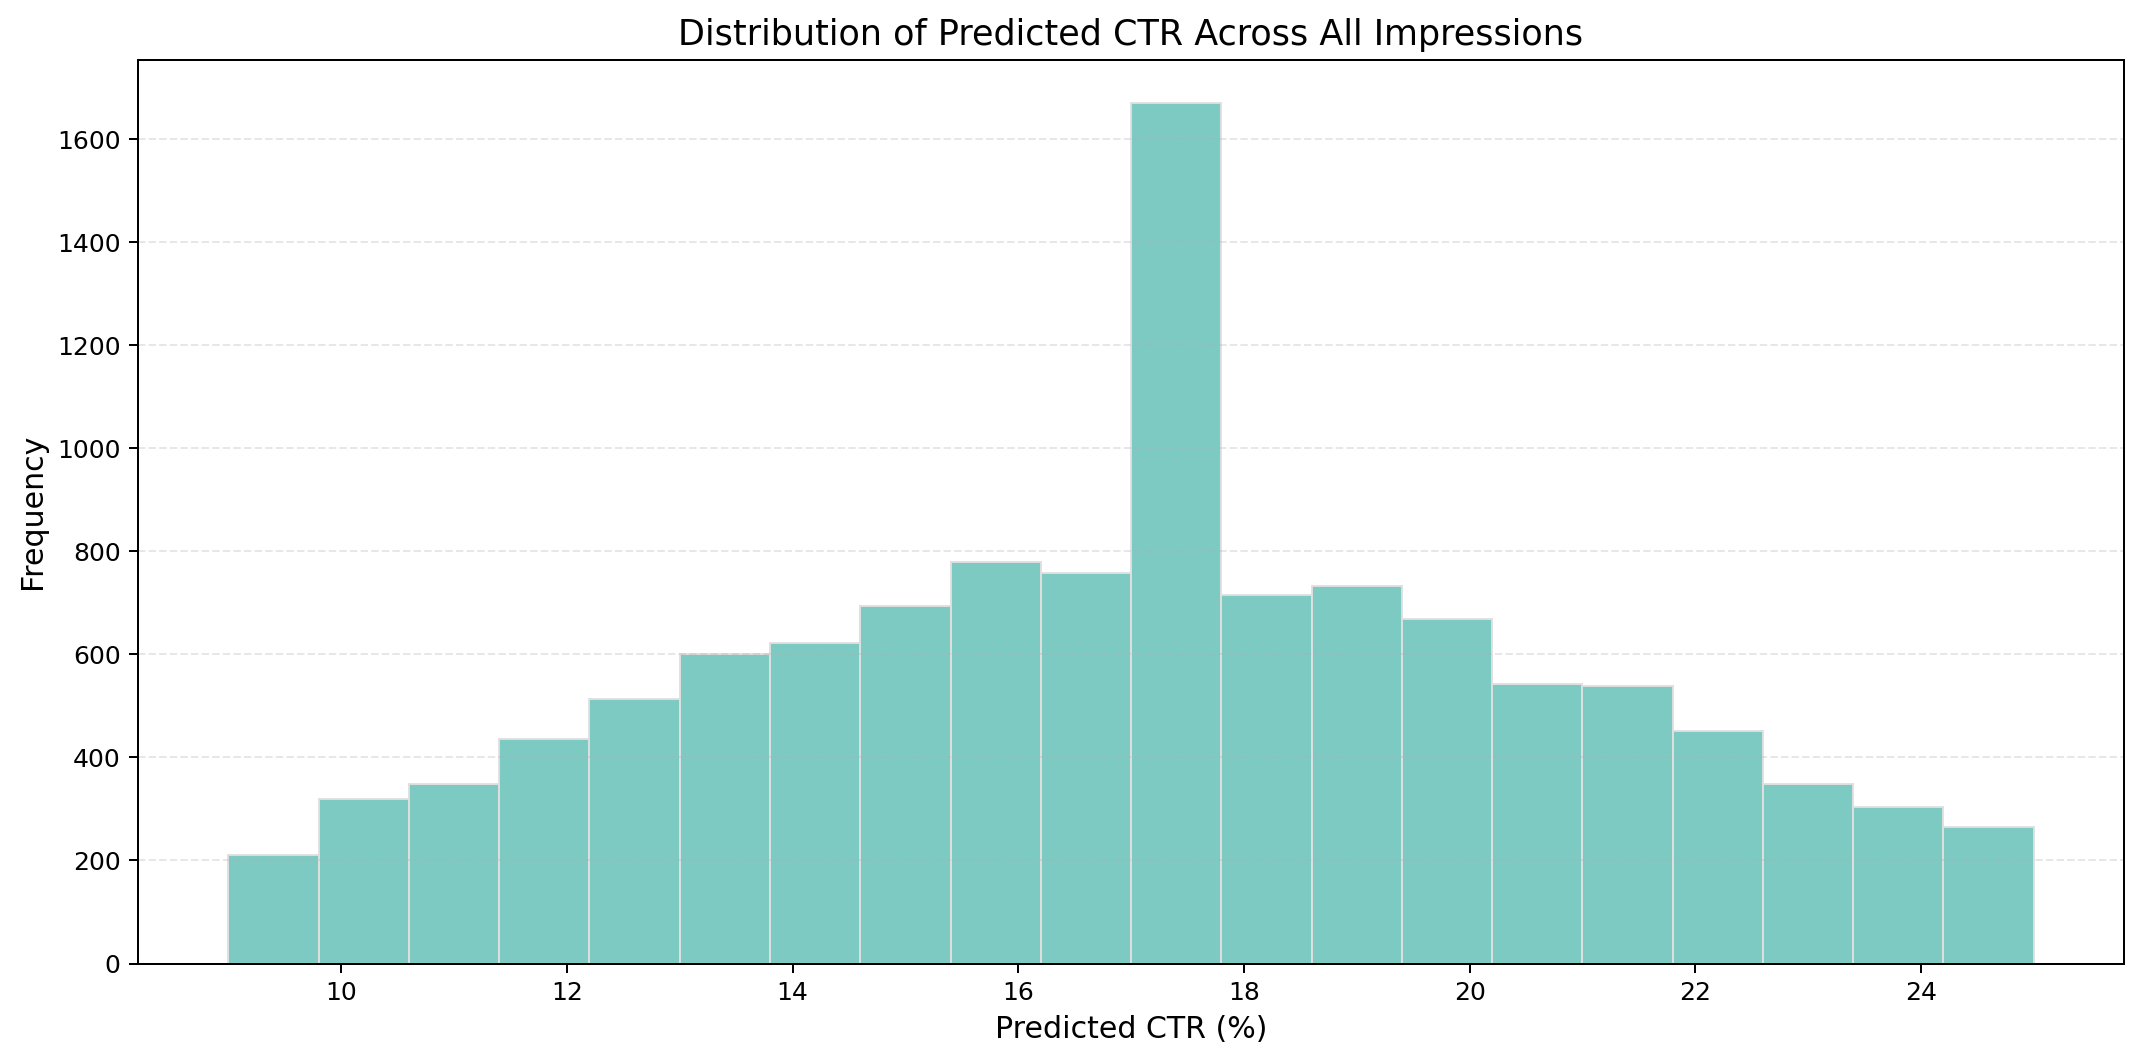

In [ ]:
# CTR Histogram –
import matplotlib.pyplot as plt

# Drop missing CTR values
ctr_values = df['predicted_ctr'].dropna()

plt.figure(figsize=(12,6), dpi=180)

plt.hist(
    ctr_values,
    bins=20,
    color='#76C7C0',
    edgecolor='#E0E0E0',
    linewidth=0.8,
    alpha=0.95
)

plt.xlabel('Predicted CTR (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Predicted CTR Across All Impressions', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


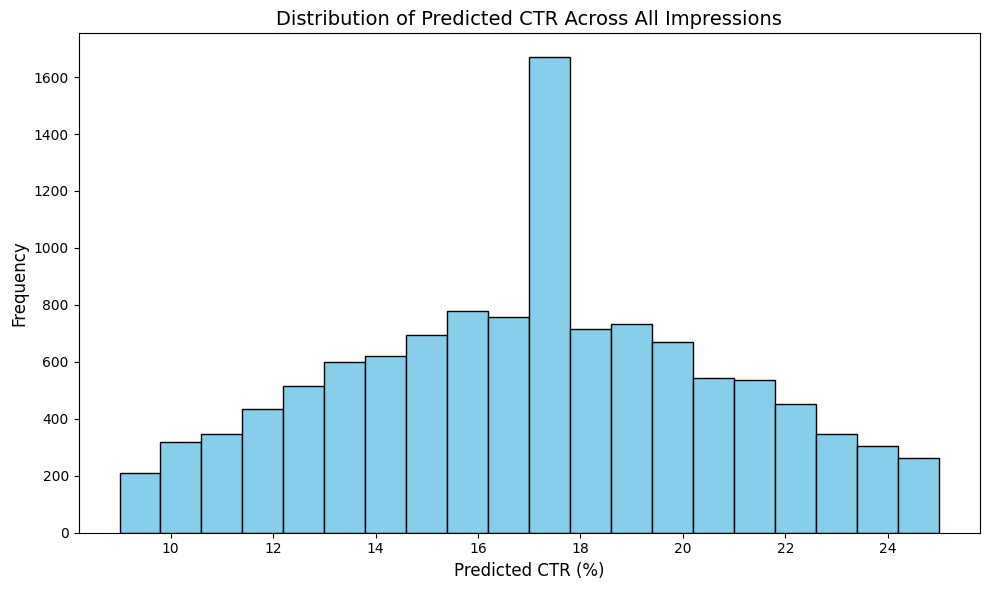

In [ ]:

# Drop missing CTR values for cleaner plotting
ctr_values = df['predicted_ctr'].dropna()

plt.figure(figsize=(10,6))
plt.hist(ctr_values, bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Predicted CTR (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Predicted CTR Across All Impressions', fontsize=14)

plt.tight_layout()
plt.show()

**Key Insights: TO BE CHANGED**
*   Ad delivery peaks from May to July with the highest monthly impressions.
*   Lowest delivery observed in January and December.
*  Seasonal rise in ad volume across mid-year, followed by a gradual decline.
*  Indicates operational trends and campaign scheduling patterns.




# **Scatter plot**

### Relationship Between Ad Spend and Predicted CTR by Sub-Type

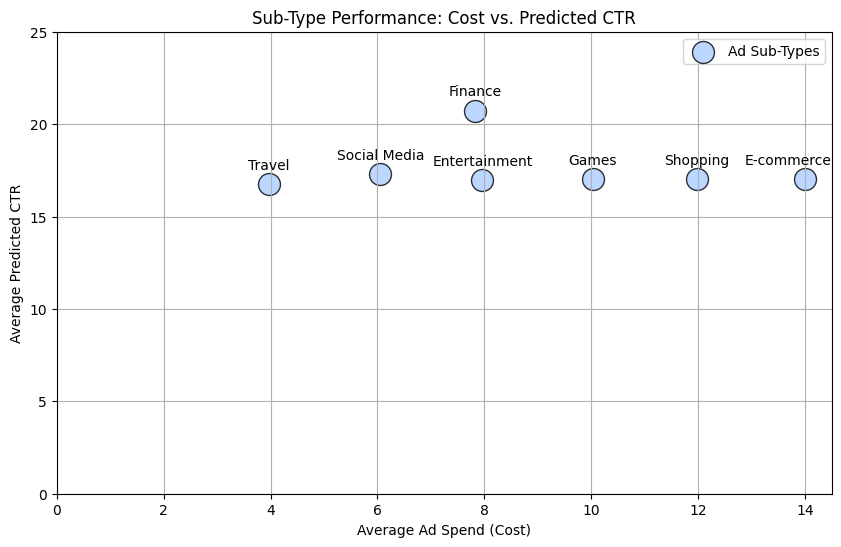

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


grouped = df.groupby('sub_type')[['cost','predicted_ctr']].mean().reset_index()



x = grouped['cost']
y = grouped['predicted_ctr']

plt.figure(figsize=(10, 6))

# Plot the scatter points

plt.scatter(
    x, y,
    s=250,
    alpha=0.8,
    color='#AACCFF',
    edgecolor='black',
    label='Ad Sub-Types'
)

plt.ylim(bottom=0, top=25)
# Add the labels
for i, row in grouped.iterrows():

    # Initialize variables with default (original) settings
    text_x_position = row['cost']
    horizontal_alignment = 'center'

    # Check for 'E-commerce' and adjust the variables
    if row['sub_type'] == 'E-commerce':
        offset = 0.50
        text_x_position = row['cost'] + offset
        horizontal_alignment = 'right'

    # Use the adjusted variables in plt.text
    plt.text(
        text_x_position,
        row['predicted_ctr'] + 0.8,
        row['sub_type'],
        ha=horizontal_alignment
    )


# --- Force axes to start from zero ---
plt.xlim(left=0)
plt.ylim(bottom=0)

# Labels and Legends
plt.xlabel('Average Ad Spend (Cost)')
plt.ylabel('Average Predicted CTR')
plt.title('Sub-Type Performance: Cost vs. Predicted CTR')
plt.legend()
plt.grid(True)
plt.show()

**Key Insights**:

*   Higher costs don’t translate to higher CTR across sub-types.​
*   Minimal negative relationship between cost and predicted CTR.
*   Sub-types show consistent CTR Performance across spend levels.

### Relationship Between Ad Spend and ROI by Sub-Type

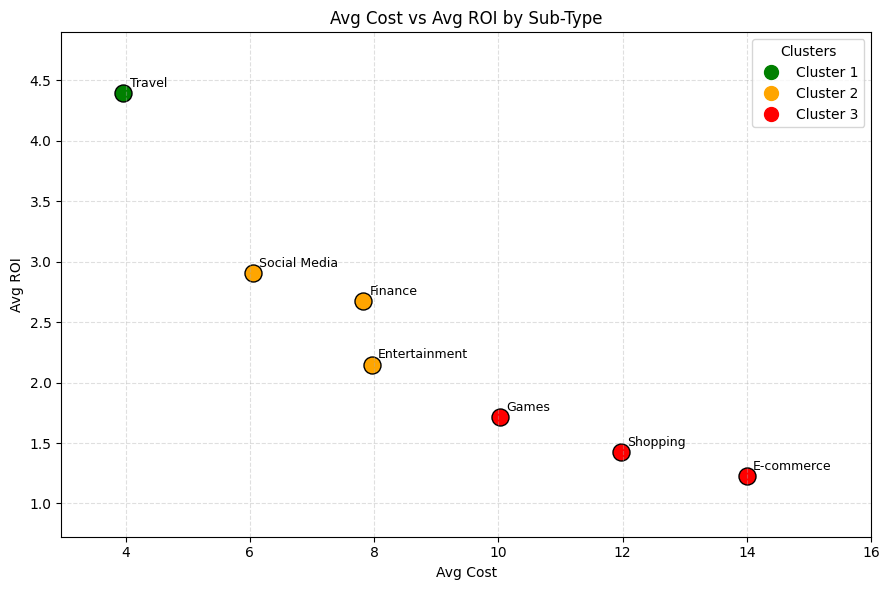

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ROI & aggregation
df["ROI"] = df["predicted_ctr"] / df["cost"]
agg = df.groupby("sub_type")[["cost", "ROI"]].mean().reset_index()
agg.columns = ["sub_type", "Avg_Cost", "Avg_ROI"]

# Cluster assignment
cluster_map = {
    "Travel": "Cluster 1",
    "Social Media": "Cluster 2",
    "Finance": "Cluster 2",
    "Entertainment": "Cluster 2",
    "Games": "Cluster 3",
    "Shopping": "Cluster 3",
    "E-commerce": "Cluster 3"
}
agg["Cluster"] = agg["sub_type"].map(cluster_map)

# Cluster colors
colors = {"Cluster 1": "green", "Cluster 2": "orange", "Cluster 3": "red"}

# Plot
plt.figure(figsize=(9,6))

for row in agg.itertuples():
    plt.scatter(row.Avg_Cost, row.Avg_ROI, s=150,
                color=colors[row.Cluster], edgecolor="black")
    plt.text(row.Avg_Cost + 0.1, row.Avg_ROI + 0.05,
             row.sub_type, fontsize=9)

# Legend
legend_items = [
    plt.Line2D([], [], marker='o', linestyle='', color=colors[c], markersize=10)
    for c in colors
]
plt.legend(legend_items, colors.keys(), title="Clusters", loc="upper right")

# Axes
plt.xlim(agg["Avg_Cost"].min() - 1, agg["Avg_Cost"].max() + 2)
plt.ylim(agg["Avg_ROI"].min() - 0.5, agg["Avg_ROI"].max() + 0.5)

plt.xlabel("Avg Cost")
plt.ylabel("Avg ROI")
plt.title("Avg Cost vs Avg ROI by Sub-Type")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


**Key Insights**: Strong inverse relationship between cost and ROI
*   Travel is the top-performing sub-type
*   Mid-cost categories provide balanced returns
*   High-cost categories consistently underperform
*   E-commerce has the weakest ROI efficiency
*   Cluster 1 (Green): Highly efficient, low-cost, high-ROI — invest more.
*   Cluster 2 (Orange): Mid-efficiency — optimize campaigns.
*   Cluster 3 (Red): Low ROI despite high cost — re-evaluate or reduce spend.

# **Line Chart**

###Monthly CTR Trend across the year 2024

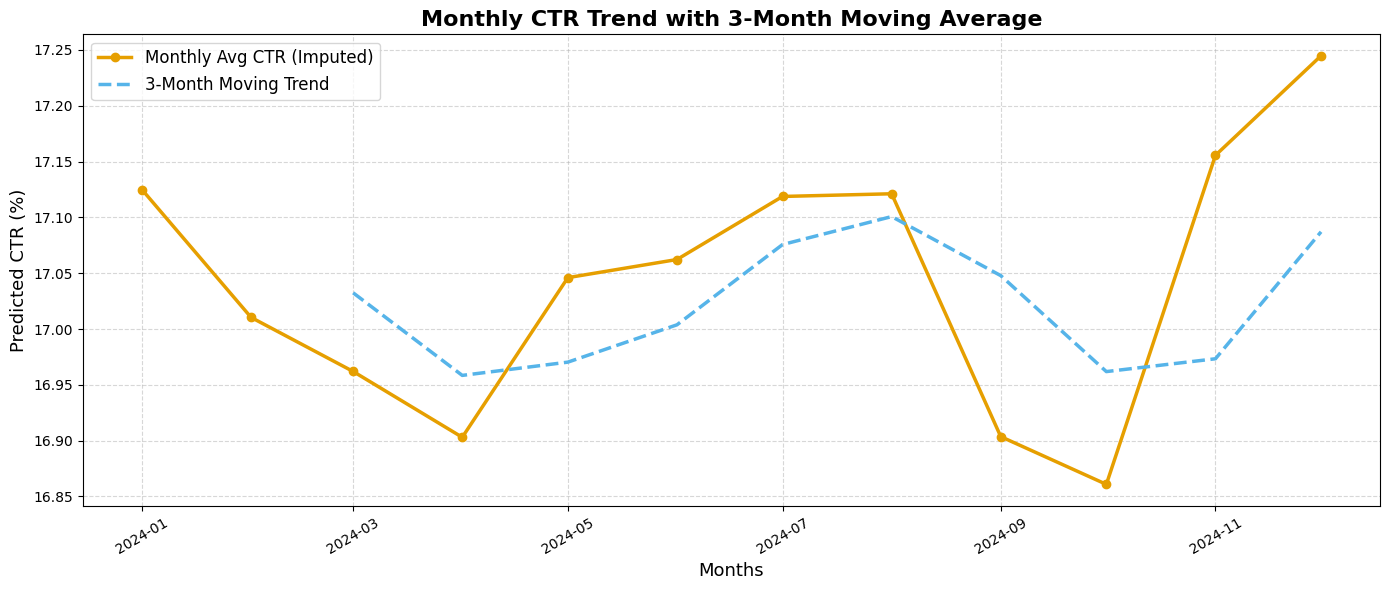

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])


# CREATED FULL DAILY DATE RANGE (Impute missing dates)
full_range = pd.date_range(df['date'].min(), df['date'].max())
# adds missing dates as NaN
daily = (
    df.groupby('date')['predicted_ctr']
    .mean()
    .reindex(full_range)
)

# Forward fill missing dates so the monthly average isn't biased
daily_filled = daily.ffill()


#  RESAMPLE TO MONTHLY AVERAGE (using imputed daily values)
monthly = daily_filled.resample('MS').mean()

# 3-MONTH MOVING AVERAGE
monthly_MA3 = monthly.rolling(3).mean()

# PLOT
plt.figure(figsize=(14, 6))

# Monthly average line
plt.plot(
    monthly.index, monthly.values,
    marker='o', linewidth=2.5, color='#E69F00',
    label="Monthly Avg CTR (Imputed)"
)

# 3-month moving trend
plt.plot(
    monthly_MA3.index, monthly_MA3.values,
    linestyle='--', linewidth=2.5, color='#56B4E9',
    label="3-Month Moving Trend"
)

plt.title(
    "Monthly CTR Trend with 3-Month Moving Average",
    fontsize=16, fontweight='bold'
)

plt.xlabel("Months", fontsize=13)
plt.ylabel("Predicted CTR (%)", fontsize=13)
plt.xticks(rotation=30)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


**Key Insights**:
*   CTR shows seasonal dips around March–April and September–October.
*   Strong recovery observed toward year-end, peaking again in November–December
*   3-month moving average smooths volatility and highlights a rising long-term momentum.
*  Despite monthly fluctuations, overall CTR remains relatively stable around ~17%.





# Conclusion

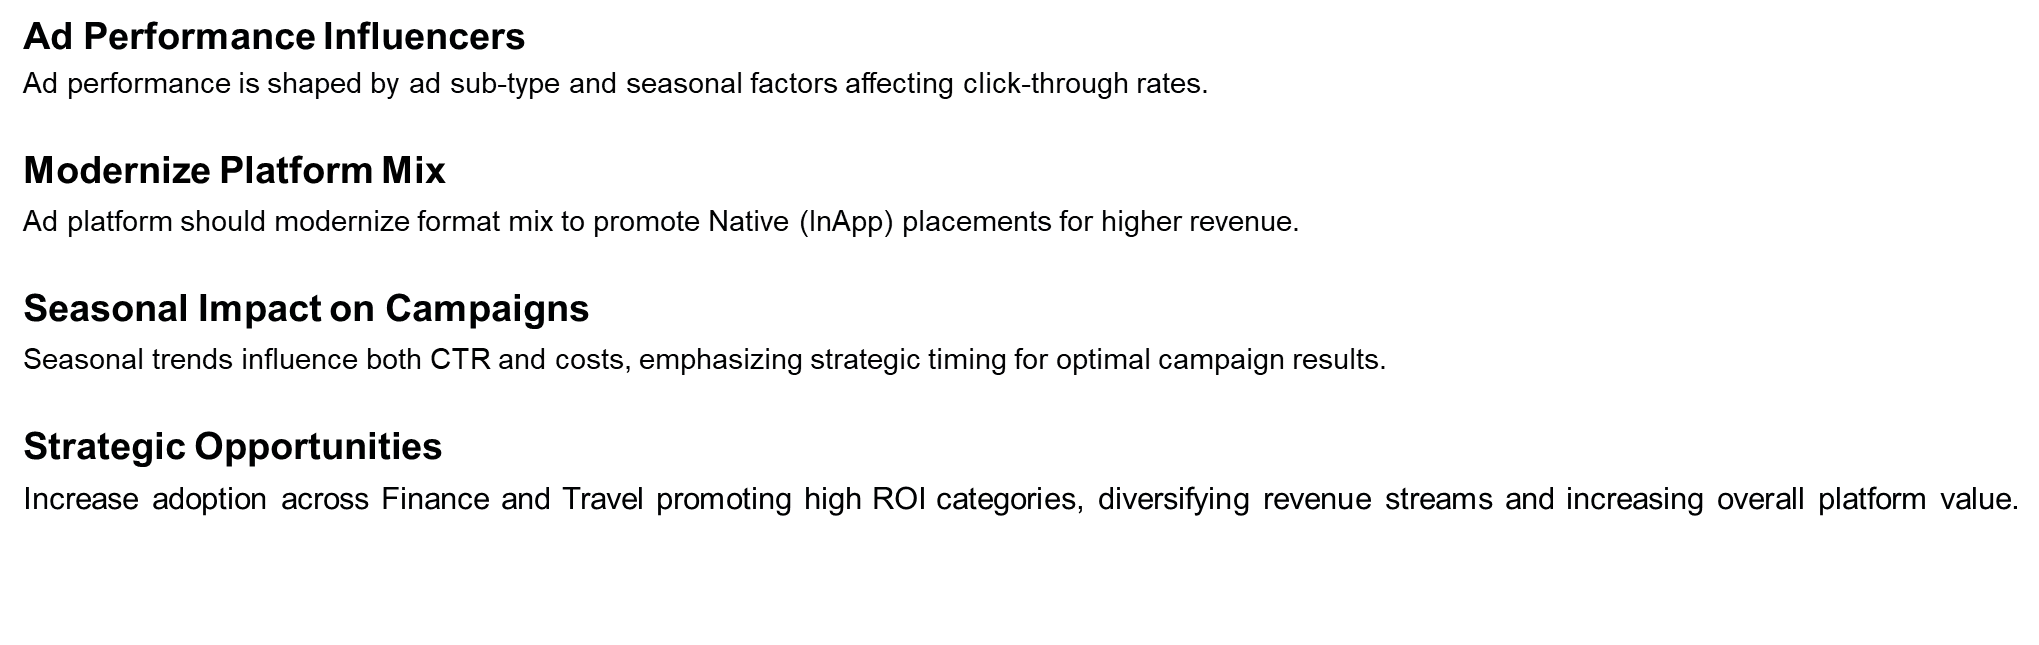